# **20248 - ASSET MANAGEMENT**
## **GROUP WORK – ASSIGNMENT 1**
## STYLE ANALYSIS

**Group members:**

3203817 – FABIO GIOVINAZZO 

3110347 – SIMONE DE LUCA 

3274708 – MANPREET KAUR SINGH 

3280738 – BLANKA MÓRI 

3099586 – GIUSEPPE ALBERTO DELL’OGLIO  

**Overview**
- Introduction to data
- A1) Style Analysis by geography
- A2) Style Analysis by sector
- B) Risk-Return plane
- Conclusion

----------------------------------------------

## **Introduction to the data**

In [72]:

#setting up directory, importing packages
import os
os.chdir("C:/Users/blank/Documents/coding/AM_assignment_1")
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import numpy as np
import statsmodels.api as sm
from contextlib import redirect_stdout
from scipy.optimize import minimize
from tabulate import tabulate
from rich.console import Console
from rich.table import Table
from rich import box
plt.style.use('fivethirtyeight')
import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import plotly.express as px
import plotly.graph_objs as go




In [73]:
#loading the file
file_path = "Cleaned_Book1BGF-Flexible-Multi-Asset-A2-EUR_fund.xlsx"
all_sheets = pd.read_excel(file_path, sheet_name=None)
sheet_overviews = {sheet_name: df.head() for sheet_name, df in all_sheets.items()}

Before the analysis let us have a look at the charcteristics of the dataset.

<details>

<summary>Code for table</summary>

```python
# Print the head of sheets
for key, value in sheet_overviews.items():
    # Create a Rich Table
    table = Table(title=key, box=box.ROUNDED)

    # Convert NumPy arrays to lists
    value = {col: value[col].tolist() for col in value}

    # Add columns to the table
    for col in value.keys():
        table.add_column(col, justify="center")

    # Add rows to the table
    for row in zip(*value.values()):
        table.add_row(*map(str, row))

    # Print the table using Rich
    console = Console()
    console.print(table)
```

</details>




<pre style="white-space:pre;overflow-x:auto;line-height:normal;font-family:Menlo,'DejaVu Sans Mono',consolas,'Courier New',monospace"><span style="font-style: italic">                  Holdings                   </span>
╭──────────────────────┬────────────────────╮
│<span style="font-weight: bold">     29-Sep-2023      </span>│<span style="font-weight: bold">     Unnamed: 1     </span>│
├──────────────────────┼────────────────────┤
│ ESG Multi-Asset Fund │        nan         │
│    Inception Date    │    04/Jan/1999     │
│ Fund Holdings as of  │         -          │
│   Total Net Assets   │ EUR 740,169,192.74 │
│ Number of Securities │       760.00       │
╰──────────────────────┴────────────────────╯
</pre>

<pre style="white-space:pre;overflow-x:auto;line-height:normal;font-family:Menlo,'DejaVu Sans Mono',consolas,'Courier New',monospace"><span style="font-style: italic">                               Historical                               </span>
╭─────────────┬───────────────┬──────────────────┬─────────────────────╮
│<span style="font-weight: bold">    As Of    </span>│<span style="font-weight: bold"> NAV per Share </span>│<span style="font-weight: bold"> Daily NAV Change </span>│<span style="font-weight: bold"> Daily NAV Change %  </span>│
├─────────────┼───────────────┼──────────────────┼─────────────────────┤
│ 11/Oct/2023 │     17.38     │       0.08       │ 0.4624277456647399  │
│ 10/Oct/2023 │     17.3      │       0.12       │ 0.6984866123399301  │
│ 09/Oct/2023 │     17.18     │       0.13       │ 0.7624633431085044  │
│ 06/Oct/2023 │     17.05     │       -0.1       │ -0.5830903790087464 │
│ 05/Oct/2023 │     17.15     │       0.06       │ 0.3510825043885313  │
╰─────────────┴───────────────┴──────────────────┴─────────────────────╯
</pre>

<pre style="white-space:pre;overflow-x:auto;line-height:normal;font-family:Menlo,'DejaVu Sans Mono',consolas,'Courier New',monospace"><span style="font-style: italic">       Performance        </span>
╭─────────────┬──────────╮
│<span style="font-weight: bold">     Mon     </span>│<span style="font-weight: bold">  Return  </span>│
├─────────────┼──────────┤
│ 31/Jan/1999 │   0.0    │
│ 28/Feb/1999 │ 0.098228 │
│ 31/Mar/1999 │ 4.906774 │
│ 30/Apr/1999 │ 0.748372 │
│ 31/May/1999 │ -2.97122 │
╰─────────────┴──────────╯
</pre>


### **Fund monthly returns**
Let's start by extracting the **monthly returns for the Blackrock ESG Multi-Asset Fund** for the selected time period, because we are interested on a monthly level, not daily. ​

In [74]:
# Extract data for the fund from the "Historical" sheet
fund_monthly_returns = all_sheets['Performance '].copy()
fund_monthly_returns['Mon'] = pd.to_datetime(fund_monthly_returns['Mon'], format='%d/%b/%Y')

# Filter data for the specified period: October 2018 to September 2023
start_date = pd.Timestamp('2018-10-01')
end_date = pd.Timestamp('2023-09-30')
fund_monthly_returns = fund_monthly_returns[(fund_monthly_returns['Mon'] >= start_date) & (fund_monthly_returns['Mon'] <= end_date)]
#keep just year and month
fund_monthly_returns['Mon'] = fund_monthly_returns['Mon'].dt.to_period('M')
#sort values and head
fund_monthly_returns = fund_monthly_returns.sort_values('Mon')
fund_head=fund_monthly_returns.head()

<details>

<summary>Code for table</summary>

```python
# Print the head of sheets
table = Table(title='Fund Returns', box=box.ROUNDED)

# Add columns to the table
table.add_column("Month", justify="center")
table.add_column("Return", justify="center")

# Add rows to the table
for _, row in fund_head.iterrows():
    table.add_row(str(row['Mon']), f"{row['Return']:.2f}")

# Print the table using Rich
console = Console()
console.print(table)
```

</details>


<pre style="white-space:pre;overflow-x:auto;line-height:normal;font-family:Menlo,'DejaVu Sans Mono',consolas,'Courier New',monospace"><span style="font-style: italic">    Fund Returns    </span>
╭─────────┬────────╮
│<span style="font-weight: bold">  Month  </span>│<span style="font-weight: bold"> Return </span>│
├─────────┼────────┤
│ 2018-10 │ -2.96  │
│ 2018-11 │  0.27  │
│ 2018-12 │ -4.32  │
│ 2019-01 │  4.17  │
│ 2019-02 │  2.44  │
╰─────────┴────────╯
</pre>


<details>

<summary>Code for figure</summary>

```python
fig = go.Figure(data=go.Scatter(x=fund_monthly_returns['Mon'].astype(str), 
                                y=fund_monthly_returns['Return'],
                                marker_color='indianred'))
fig.update_layout(
    title='Monthly Fund Returns Over Time',
    xaxis=dict(title='Months'),
    yaxis=dict(title='Return (%change)'),
    showlegend=False,
    title_x=0.5, 
)
fig.show()
fig.write_image("fund1.png", format="png", width=1000, height=600, scale=3)
```

</details>

![](fund.png)




### **Indices monthly returns**

We'll proceed to analyze the indices from the "Indices.xlsx" file. The file contained the actual return values, which due to  their wide range do not provide much value. It is rather adviced to look at the percentage changes, which show the dynamic movements of the  indices. By transforming the data this way, it is easier to find the best indices that follow the fluctuations of our fund.

In [75]:
indices_file_path = "Indices.xlsx"

indices_monthly_df = pd.read_excel(indices_file_path, sheet_name="Monthly")

#convert it into year-month format so that it will be easy to merge
indices_monthly_df['Mon'] = pd.to_datetime(indices_monthly_df['Mon'], format='%d/%m/%Y')
indices_monthly_df['Mon'] = indices_monthly_df['Mon'].dt.to_period('M')

indices_monthly_df.set_index('Mon', inplace=True)


#multiply by 100 so that we get the numbers in percentage form, like in the case of the funds
index_monthly_returns = 100*indices_monthly_df.pct_change().dropna()

index_head=index_monthly_returns.head()

For easier and more transparent analysis, we separate the dataset into geography and sector based indices.

In [76]:
#create two dataframes for geographical and equity analysis
index_ge = index_monthly_returns.iloc[:, :17] 
index_se = index_monthly_returns.iloc[:, 17:] 

#merge fund and index datasets 
#dataset including geographic indices
style_ge = pd.merge(fund_monthly_returns, index_ge, on='Mon')
style_ge.set_index('Mon', inplace=True)

#dataset including sector indices
style_se = pd.merge(fund_monthly_returns, index_se, on='Mon')
style_se.set_index('Mon', inplace=True)

#peak at the geographic dataframe
ge_head=style_ge.head()

# Select the first few columns (adjust the number as needed)
selected_columns = ge_head.columns[:10]


<details>

<summary>Code for table</summary>

```python
# Create a Rich Table
table = Table(title='Returns by geographical areas', box=box.SIMPLE_HEAD, caption= 'First 5 months of the first 10 indices' )

# Add columns to the table
table.add_column("Month", justify="center")
for column in selected_columns:
    table.add_column(column, justify="center")

# Add rows to the table
for index, row in ge_head.iterrows():
    table.add_row(str(index), *[f"{value:.4f}" for value in row[selected_columns]])

# Print the table using Rich
console = Console()
console.print(table)
```

</details>





<pre style="white-space:pre;overflow-x:auto;line-height:normal;font-family:Menlo,'DejaVu Sans Mono',consolas,'Courier New',monospace"><span style="font-style: italic">                                           Returns by geographical areas                                           </span>
                                                                                                                   
 <span style="font-weight: bold">         </span> <span style="font-weight: bold">         </span> <span style="font-weight: bold"> I31914… </span> <span style="font-weight: bold"> I00001EU </span> <span style="font-weight: bold"> LBEATR… </span> <span style="font-weight: bold"> LEGVTREU </span> <span style="font-weight: bold"> LECPTR… </span> <span style="font-weight: bold"> LE13TREU </span> <span style="font-weight: bold"> LE35TR… </span> <span style="font-weight: bold"> LE57TREU </span> <span style="font-weight: bold"> I02113… </span> 
 <span style="font-weight: bold">  Month  </span> <span style="font-weight: bold"> Return  </span> <span style="font-weight: bold">  Index  </span> <span style="font-weight: bold">  Index   </span> <span style="font-weight: bold">  Index  </span> <span style="font-weight: bold">  Index   </span> <span style="font-weight: bold">  Index  </span> <span style="font-weight: bold">  Index   </span> <span style="font-weight: bold">  Index  </span> <span style="font-weight: bold">  Index   </span> <span style="font-weight: bold">  Index  </span> 
 ───────────────────────────────────────────────────────────────────────────────────────────────────────────────── 
  2018-10   -2.9586   2.6896     1.7008    -0.0233    0.1339    -0.1811    0.0425    0.0574     0.0362    -0.2546  
  2018-11   0.2710    0.2534     0.6681    0.2429     0.1465    -0.6428    0.0393    0.1368     0.2305    0.4772   
  2018-12   -4.3243   -0.7671    0.8661    0.6447     0.3302    0.2085     0.1523    0.4230     0.5392    1.3978   
  2019-01   4.1667    -0.1855    0.6832    0.9574     0.7007    1.0864     0.0493    0.3817     0.8957    2.1795   
  2019-02   2.4407    0.9691     0.7100    -0.0774    0.0088    0.6874    -0.0004    0.0481     0.1504    -0.6459  
                                                                                                                   
<span style="color: #7f7f7f; text-decoration-color: #7f7f7f; font-style: italic">                                      First 5 months of the first 10 indices                                       </span>
</pre>


<details>

<summary>Code for figure</summary>

```python
# Create a Figure
fig = go.Figure()

# Add traces for each time series, excluding 'Return'
for column in style_ge.columns:
    if column != 'Return':
        fig.add_trace(go.Scatter(x=style_ge.index.astype(str), 
                                 y=style_ge[column],
                                 mode='lines', name=column, line=dict(width=2)))

# Add 'Return' variable with a thick black dashed line
fig.add_trace(go.Scatter(x=style_ge.index.astype(str), 
                         y=style_ge['Return'],
                         mode='lines', name='Return', line=dict(dash='dash', width=3, color='black')))

# Update layout
fig.update_layout(
    title='Geographic Indices Over Time',
    xaxis=dict(title='Months'),
    yaxis=dict(title='Return (%change)'),
    showlegend=True,
    legend=dict(x=0, y=-0.15, traceorder='normal', orientation='h', bgcolor='rgba(255, 255, 255, 0.7)'
                , xanchor='left', yanchor='top'),
    autosize=False,
    title_x=0.5,
    width=1000,
    height=600
)
fig.write_image("style-ge.png", format="png", width=1000, height=600, scale=3)
fig.show()
```

</details>

![](ge.png)






In [77]:

# Create a Figure
fig = go.Figure()

# Add traces for each time series, excluding 'Return'
for column in style_ge.columns:
    if column != 'Return':
        fig.add_trace(go.Scatter(x=style_ge.index.astype(str), 
                                 y=style_ge[column],
                                 mode='lines', name=column, line=dict(width=2)))

# Add 'Return' variable with a thick black dashed line
fig.add_trace(go.Scatter(x=style_ge.index.astype(str), 
                         y=style_ge['Return'],
                         mode='lines', name='Return', line=dict(dash='dash', width=3, color='black')))

# Update layout
fig.update_layout(
    title='Geographic Indices Over Time',
    xaxis=dict(title='Months'),
    yaxis=dict(title='Return (%change)'),
    showlegend=True,
    legend=dict(x=0, y=-0.15, traceorder='normal', orientation='h', bgcolor='rgba(255, 255, 255, 0.7)'
                , xanchor='left', yanchor='top'),
    autosize=False,
    title_x=0.5,
    width=1000,
    height=600
)
fig.write_image("style-ge.png", format="png", width=1000, height=600, scale=3)
fig.show()



It is clear that their is an overall seasonal trend in the changes. Some indices are experiencing more radical fluctuations, while some are moving inside just noarrow borders.What is most apparent, is that the selected fund follows similar movements to the MXGB, MXUS, MSERP and the MXEUG indices, which stand out with their bigger values. However, this match depends highly on the chosen period, hence, a deeper inspection is needed to find the best indices to predict the fund returns.

# **A1) Style analysis by countries/geographic areas**
## **0. selecting indices**

Since the fund consisits of 50% MSCI World Index and 50% Bloomberg Aggregate Bond Index hedged into EUR, the vaariables that predict the returns on this fund the best have to be somehow related to the components of these fund indices. The MSCI World Index is highly USA focused, leaving the UK, Canda, France, Japan and the others a smaller share. The sector weights are more distributed, the most dominant being the tech, financial and healthcare sectors. In line with this, the Bloomberg Aggregate Bond Index is also moslty relying oon US Treasury Bills and Notes, followed by the Japanese. After careful considerations, the following explanatory indices got selected: 
-  **I00039EU Index** (Global High Yield):  High-yield bonds are often influenced by economic conditions. As the global economy goes through cycles, the performance of high-yield securities may reflect changes in economic expectations. This sensitivity can provide insights into broader economic trends that might impact the MSCI World Index.
-  **I31914EU Index** (Bloomberg Cash Index): Changes in the Bloomberg Cash Index can be indicative of broader market conditions and risk sentiment. During periods of uncertainty or risk aversion, investors may seek safety in cash or cash equivalents. Monitoring the Bloomberg Cash Index provides insights into shifts in market sentiment, which can impact both equity (MSCI World) and fixed-income (Bloomberg Aggregate Bond) components of the fund.
-  **I00001EU Index** (U.S. Aggregate): The U.S. Aggregate Bond Index represents a broad range of U.S. investment-grade fixed-income securities, including government, corporate, and mortgage-backed bonds. Its performance reflects the overall health of the U.S. bond market, thus directly impacting half of the fund's composition.
-  **'LE57TREU Index** (Euro-Aggregate: 5-7 Year): This duration closely aligns with the fixed-income component of the fund, which includes the Bloomberg Aggregate Bond Index. Duration matching helps manage interest rate risk, providing a more accurate prediction of bond portfolio returns
-  **I00163EU Index** (Asian-Pacific Aggregate): The inclusion of the Asian-Pacific Aggregate provides geographical diversification. As Asian-Pacific economies may have different economic cycles than those in the MSCI World Index and the Eurozone, the index can offer exposure to unique market dynamics.
-  **I04276EU Index** (EM USD Aggregate: Investment Grade): The inclusion of emerging market (EM) bonds enhances the diversification of the fund. EM bonds may have different risk-return characteristics compared to developed market bonds, providing additional sources of returns.
-  **MXEUG Index** (MSCI Europe Excluding United Kingdom Index):  Given that the fund includes a significant portion invested in the MSCI World Index, which is a global equity index, the European component can offer insights into how European markets, industries, and companies may impact the overall fund performance.
-  **MXUS Index** (MSCI USA): Given that the index represents the equity market performance of the United State and that 50% of the fund is allocated to the MSCI World Index, which includes the USA, the MXUS Index becomes a key indicator of the equity portion of the fund.
-  **MSERP Index** (MSCI Pacific Index):The Index represents equities from the Pacific region, including countries like Japan, Australia, and Hong Kong. Given that the MSCI World Index covers a broad global equity market, the MSERP Index provides a more focused insight into the performance of Pacific-region stocks.
-  **MXGB Index** (MSCI United Kingdom Index): The MXGB Index provides specific insights into the performance of the UK equity market. Changes in the UK economic conditions, political landscape, and corporate performance can directly impact the returns of the fund, especially the equity component.

In [78]:
selected_indices = ['I00039EU Index','I31914EU Index','I00001EU Index',
                    'LE57TREU Index', 'I00163EU Index', 'I04276EU Index',
                    'MXEUG Index', 'MXUS Index', 'MSERP Index', 'MXGB Index']

#variables
y = style_ge['Return']

x = style_ge.drop(columns=['Return'])

#define selected predictor variables
x_selected = x[selected_indices]

Now that the ideal indices are selected, we can assign optimal weights to them so that they will explain the fund returns the best way possible. In style analysis, this is done by minimizing the Error Volatility. However, due to the complexity of the indices these weights can vary greatly based on the selected time period. Consequently, to get a holistic overview, the style analysis will be conducted both from strategic, dynamic and tactic views.

## **1.  Strategic (60 months)**

### **1.1 Strategic optimized weights and R²**

In [79]:
# Create DataFrame
df = pd.DataFrame(x_selected)

# Assuming you have a list of weights
num_indices = len(selected_indices)

# Initialize weights
initial_weight = 1 / num_indices
initialized_weights = [initial_weight] * num_indices

# Function to calculate EV
def EV(weights, x, y):
    style_returns = np.dot(x, weights)
    errors = y - style_returns
    return np.var(errors)

# Constraint: sum of weights is 1
constraint = ({'type': 'eq', 'fun': lambda w: np.sum(w) - 1})

# Bounds: each weight should be between 0 and 1
bounds = [(0, 1) for _ in range(num_indices)]

# Initial guess for weights
initial_guess = initialized_weights

# Perform optimization
result = minimize(EV, initial_guess, args=(x_selected.values, y), 
                  method='SLSQP', bounds=bounds, constraints=constraint)

# Extract optimized weights
optimized_weights = result.x

# Calculate optimized style returns and errors separately
optimized_style_returns = np.dot(x_selected.values, optimized_weights)
optimized_errors = y - optimized_style_returns

# R-squared
FV = np.var(y)
EV_opt = EV(optimized_weights, x_selected.values, y)
r_squared = 1 - (EV_opt / FV)

# Create a DataFrame with optimized weights and corresponding index names
optimized_weights_df = pd.DataFrame({'Indices': selected_indices,
                                     'Style Weight': optimized_weights})



<details>

<summary>Code for table</summary>

```python
# Sort DataFrame by the 'Style Weight' column in descending order
optimized_weights_df = optimized_weights_df.sort_values(by='Style Weight', ascending=False)

# Create a Rich Table
table = Table(title='Strategic Results', box=box.ROUNDED, caption='Geographic indices')

# Add columns to the table in the desired order
table.add_column("Indices", justify="right")
table.add_column("Style Weight", justify="left")  


# Add rows to the table
for _, row in optimized_weights_df.iterrows():
    # Format 'Style Weight' column to show in scientific notation with 5 digits
    style_weight_value = row['Style Weight']
    style_weight_formatted = f"[cyan]{style_weight_value:.5e}[/cyan]" if style_weight_value > 0 else f"{style_weight_value:.5e}"
    row_values = [row["Indices"], style_weight_formatted]  # Add other columns as needed
    table.add_row(*row_values)

# Create a separate Rich Table for R-squared value
rsquared_table = Table(box=box.ROUNDED, title='R²', show_header=False)

# Add row to the R-squared table
rsquared_table.add_row(f"[cyan bold]{r_squared:.4f}[/cyan bold]")


# Print the table using Rich
console = Console()
console.print(table)
console.print(rsquared_table)
```

</details>



<pre style="white-space:pre;overflow-x:auto;line-height:normal;font-family:Menlo,'DejaVu Sans Mono',consolas,'Courier New',monospace"><span style="font-style: italic">        Strategic Results        </span>
╭────────────────┬──────────────╮
│<span style="font-weight: bold">        Indices </span>│<span style="font-weight: bold"> Style Weight </span>│
├────────────────┼──────────────┤
│ LE57TREU Index │ <span style="color: #008080; text-decoration-color: #008080">3.57387e-01</span>  │
│     MXUS Index │ <span style="color: #008080; text-decoration-color: #008080">3.43111e-01</span>  │
│    MXEUG Index │ <span style="color: #008080; text-decoration-color: #008080">8.54643e-02</span>  │
│ I00163EU Index │ <span style="color: #008080; text-decoration-color: #008080">8.54179e-02</span>  │
│ I31914EU Index │ <span style="color: #008080; text-decoration-color: #008080">8.33946e-02</span>  │
│    MSERP Index │ <span style="color: #008080; text-decoration-color: #008080">4.26360e-02</span>  │
│ I00001EU Index │ <span style="color: #008080; text-decoration-color: #008080">2.58971e-03</span>  │
│ I00039EU Index │ <span style="color: #008080; text-decoration-color: #008080">2.90798e-16</span>  │
│ I04276EU Index │ <span style="color: #008080; text-decoration-color: #008080">1.99059e-16</span>  │
│     MXGB Index │ 0.00000e+00  │
╰────────────────┴──────────────╯
<span style="color: #7f7f7f; text-decoration-color: #7f7f7f; font-style: italic">       Geographic indices        </span>
</pre>
<pre style="white-space:pre;overflow-x:auto;line-height:normal;font-family:Menlo,'DejaVu Sans Mono',consolas,'Courier New',monospace"><span style="font-style: italic">    R²    </span>
╭────────╮
│ <span style="color: #008080; text-decoration-color: #008080; font-weight: bold">0.8641</span> │
╰────────╯
</pre>


Since these results will be used in the B) part of the analysis, it is useful to store them in the necessary forms.

In [80]:
#store values for B) part
# saving index returns
returns=x_selected
# saving style benchmark optimized returns
style_weights = optimized_weights
style_benchmark = optimized_style_returns
style_benchmark_expected_return = style_benchmark.mean()
style_benchmark_risk = style_benchmark.std()
# Calculate the expected return and risk for the fund
fund_expected_return =  y.mean()
fund_risk = y.std()


### **1.2 Plotting strategic results**

<details>

<summary>Code for figure</summary>

```python
labels = selected_indices
values = optimized_weights

fig = go.Figure(data=[go.Pie(labels=labels, values=values, 
                             textinfo='percent+label', 
                             hoverinfo='label+percent', 
                             marker=dict(colors=px.colors.qualitative.Bold),
                             textposition='inside', hole=0.3)])

fig.update_layout(
    title='<b>Strategic Style Analysis</b>',
    title_font=dict(size=20, family='Arial', color='black'),
    annotations=[dict(text='Geographic', font=dict(size=12, family='Arial', color='black'),
                      showarrow=False, x=0.5, y=0.5)],
    height=600,  
    width=600, 
    showlegend=False,
    title_x=0.5
)


fig.show()

fig.write_image("str.png", format="png", width=300, height=300, scale=3)
```

</details>

![](str_1.png)





In [81]:
labels = selected_indices
values = optimized_weights

fig = go.Figure(data=[go.Pie(labels=labels, values=values, 
                             textinfo='percent+label', 
                             hoverinfo='label+percent', 
                             marker=dict(colors=px.colors.qualitative.Bold),
                             textposition='inside', hole=0.3)])

fig.update_layout(
    title='<b>Strategic Style Analysis</b>',
    title_font=dict(size=20, family='Arial', color='black'),
    annotations=[dict(text='Geographic', font=dict(size=12, family='Arial', color='black'),
                      showarrow=False, x=0.5, y=0.5)],
    height=600,  
    width=600, 
    showlegend=False,
    title_x=0.5
)


fig.show()

fig.write_html('str_1.html')


The chosen indices explain all togather 86.4% of the variance in the fund returns. This is mostly thanks to the **LE57TREU** and **MXUS** indices, which togather represent 70% of the weights. This means that the investment styles of LE57TREU and MXUS align the most with the fund's overall investment style.Afterwards the **MXEUG, I00163EU, I31914EU, MSERP** indices, focusing more on the emerging markets and the Pacific region are filling the remaining gaps, leaving the United Kingdom insignificant.

## **2. Rolling (25 periods of 36 months each)**
### **2.1 Rolling optimized weights and R²**

In [82]:
# Function to get effective weights and optimized EV for a rolling window
def get_effective_weights_and_EV(x, y, window_size):
    effective_weights_list = []
    optimized_EV_list = []
    r_squared_list = []

    for i in range(len(x) - window_size + 1):
        # Extract data for the current window
        x_window = x.iloc[i:i+window_size]
        y_window = y.iloc[i:i+window_size]

        # Initialize weights
        num_indices = len(x_window.columns)
        initial_weight = 1 / num_indices
        initialized_weights = [initial_weight for _ in range(num_indices)]

        # Constraint: sum of weights is 1
        constraint = ({'type': 'eq', 'fun': lambda w: np.sum(w) - 1})

        # Bounds: each weight should be between 0 and 1
        bounds = [(0, 1) for _ in range(len(initialized_weights))]

        # Initial guess for weights
        initial_guess = initialized_weights

        # Perform optimization for the current window
        result = minimize(EV, initial_guess, args=(x_window.values, y_window),
                          method='SLSQP', bounds=bounds, constraints=constraint)

        # Extract optimized weights and EV
        optimized_weights = result.x
        optimized_EV = EV(optimized_weights, x_window.values, y_window)

        # Calculate FV for the current window
        current_FV = np.var(y_window)

        effective_weights_list.append(optimized_weights)
        optimized_EV_list.append(optimized_EV)
        r_squared_list.append(1 - (optimized_EV / current_FV))

    return pd.DataFrame(effective_weights_list, 
                        columns=x.columns),optimized_EV_list, r_squared_list

# Set the rolling window size
window_size = 36

# Get effective weights, optimized EV, and Rsquared for each rolling window
effective_weights_df, optimized_EV_list, r_squared_list = get_effective_weights_and_EV(x_selected,  y, window_size)
ef_head=effective_weights_df.head()
print(effective_weights_df)


    I00039EU Index  I31914EU Index  I00001EU Index  LE57TREU Index  \
0     1.771927e-15        0.043949    0.000000e+00        0.510126   
1     2.320798e-16        0.062601    2.514525e-16        0.501998   
2     5.375964e-16        0.063621    0.000000e+00        0.502190   
3     7.491378e-16        0.060840    0.000000e+00        0.507362   
4     0.000000e+00        0.033425    0.000000e+00        0.527004   
5     0.000000e+00        0.032353    2.040011e-16        0.528486   
6     0.000000e+00        0.058543    1.469321e-16        0.493106   
7     2.004413e-16        0.119092    4.199329e-16        0.431476   
8     1.333489e-15        0.126087    0.000000e+00        0.423419   
9     7.871850e-16        0.111975    0.000000e+00        0.434391   
10    1.828755e-15        0.119379    4.116691e-16        0.435455   
11    0.000000e+00        0.142525    2.288994e-16        0.410974   
12    6.720372e-16        0.105384    0.000000e+00        0.435964   
13    1.291365e-15  

In [83]:
# Save weights_data 
effective_weights_df.to_csv('weights.csv', index=False)




<details>

<summary>Code for table</summary>

```python
table = Table(title='Geographic Rolling Weights', box=box.SIMPLE_HEAD, caption='First 5 rolling windows')

# Add columns to the table
for column in ef_head.columns:
    table.add_column(column, justify="center")

# Add a new column for the first 5 values of R-squared
table.add_column("R²", justify="center")

# Add rows to the table
for i, (index, row) in enumerate(ef_head.iterrows()):
    # Add row values
    values = [f"{value:.4f}" for value in row[ef_head.columns]]
    
    # Add R-squared value as a new column
    values.append(f"{r_squared_list[i]:.4f}")

    # Add the row to the table
    table.add_row(*values)

    # Break after adding the first 5 rows
    if i == 4:
        break

# Print the table using Rich
console = Console()
console.print(table)
```

</details>


<pre style="white-space:pre;overflow-x:auto;line-height:normal;font-family:Menlo,'DejaVu Sans Mono',consolas,'Courier New',monospace"><span style="font-style: italic">                                            Geographic Rolling Weights                                             </span>
                                                                                                                   
 <span style="font-weight: bold"> I00039EU </span> <span style="font-weight: bold"> I31914… </span> <span style="font-weight: bold"> I00001EU </span> <span style="font-weight: bold"> LE57TR… </span> <span style="font-weight: bold"> I00163EU </span> <span style="font-weight: bold"> I04276… </span> <span style="font-weight: bold">  MXEUG   </span> <span style="font-weight: bold">  MXUS   </span> <span style="font-weight: bold">  MSERP   </span> <span style="font-weight: bold">  MXGB   </span> <span style="font-weight: bold">        </span> 
 <span style="font-weight: bold">  Index   </span> <span style="font-weight: bold">  Index  </span> <span style="font-weight: bold">  Index   </span> <span style="font-weight: bold">  Index  </span> <span style="font-weight: bold">  Index   </span> <span style="font-weight: bold">  Index  </span> <span style="font-weight: bold">  Index   </span> <span style="font-weight: bold">  Index  </span> <span style="font-weight: bold">  Index   </span> <span style="font-weight: bold">  Index  </span> <span style="font-weight: bold">   R²   </span> 
 ───────────────────────────────────────────────────────────────────────────────────────────────────────────────── 
   0.0000    0.0439     0.0000    0.5101     0.0000    0.0000     0.0000    0.4330     0.0047    0.0082    0.8876  
   0.0000    0.0626     0.0000    0.5020     0.0000    0.0000     0.0000    0.4214     0.0000    0.0140    0.8877  
   0.0000    0.0636     0.0000    0.5022     0.0000    0.0000     0.0000    0.4266     0.0000    0.0076    0.8894  
   0.0000    0.0608     0.0000    0.5074     0.0000    0.0000     0.0000    0.4101     0.0000    0.0217    0.8714  
   0.0000    0.0334     0.0000    0.5270     0.0000    0.0000     0.0050    0.4335     0.0011    0.0000    0.8666  
                                                                                                                   
<span style="color: #7f7f7f; text-decoration-color: #7f7f7f; font-style: italic">                                              First 5 rolling windows                                              </span>
</pre>


### **2.2 Plotting rolling results**

<details>

<summary>Code for figure</summary>

```python
import plotly.graph_objects as go
from plotly.subplots import make_subplots
# Create a Plotly subplot with dual-y axis plot
fig = make_subplots(specs=[[{"secondary_y": True}]])

# Set a bold color palette
bold_colors = px.colors.qualitative.Bold

# Plot 100% stacked area chart for effective weights
for col, color in zip(effective_weights_df.columns, bold_colors):
    fill_color_lighter = f'rgba{color[3:-1]},0.6)'  # Make fill color lighter (adjust 0.5 for opacity)
    fig.add_trace(go.Scatter(x=effective_weights_df.index, y=effective_weights_df[col],
                             mode='lines', stackgroup='one', name=col,
                             fillcolor=fill_color_lighter, fill='tonexty', line=dict(color=color)))

# Set layout for the first y-axis
fig.update_yaxes(title_text='Weights', secondary_y=False)

# Plot line chart for R-squared on the second y-axis
fig.add_trace(go.Scatter(x=effective_weights_df.index, y=r_squared_list,
                         mode='lines', name='R²', line=dict(dash='dash', color='black')), secondary_y=True)

# Set layout for the second y-axis
fig.update_yaxes(title_text='R²', secondary_y=True)

# Set layout for the x-axis
fig.update_xaxes(title_text='Time')

# Set layout for the entire figure
fig.update_layout(title_text='<b>Weights and R² Over Time</b>',
                  height=600, width=1000, showlegend=True, title_x=0.5, title_font=dict(size=20, family='Arial', color='black'),
)

# Show the plot
fig.show()

fig.write_image("rol1.png", format="png", width=1000, height=600, scale=3)
```

</details>

![](rol1.png)










As the graph shows, the main predictors over time are the **LE57TREU** and **MXUS** indices, in harmony with the findings of the the startegic analysis. Together with the **I31914EU** index these three seem to have a stable significant presence. However, the role of the other indices are rather fluctuating, and they just appear in the second half of the rolling. The complexity of predicting the fund with these indices is represented with the path of the r-squared over time, which is rather volatile. But after having a closer look it is clear that the r-square moves between 85% and 90%, which implies trustworty results.

## **3.  Tactical (last months)**

### **3.1 Tactical optimized weights and R²**

In [84]:
# Assuming you have a list of weights
num_indices = len(x_selected.columns)

# Initialize weights
initial_weight = 1 / num_indices
initialized_weights = [initial_weight for _ in range(num_indices)]

# Extract the last 8 months data
last_months_data = x_selected.tail(8)
y_last_months = y.tail(8)

# Constraint: sum of weights is 1
constraint = ({'type': 'eq', 'fun': lambda w: np.sum(w) - 1})

# Bounds: each weight should be between 0 and 1
bounds = [(0, 1) for _ in range(len(initialized_weights))]

# Initial guess for weights
initial_guess = initialized_weights

# Perform optimization for the last 8 months
result = minimize(EV, initial_guess, 
                  args=(last_months_data.values, y_last_months), 
                  method='SLSQP', bounds=bounds, constraints=constraint)

# Extract optimized weights
optimized_weights = result.x
#R-squared
FV = np.var(y_last_months)
EV_opt = EV(optimized_weights, last_months_data.values, y_last_months)
r_squared=1-(EV_opt/FV)


# Create a DataFrame with optimized weights and corresponding index names
optimized_weights_df = pd.DataFrame({'Indices': selected_indices,
                                     'Style Weight': optimized_weights})



<details>

<summary>Code for table</summary>

```python
# Sort DataFrame by the 'Style Weight' column in descending order
optimized_weights_df = optimized_weights_df.sort_values(by='Style Weight', ascending=False)
# Create a Rich Table
table = Table(title='Tactical Results', box=box.ROUNDED)

# Add columns to the table in the desired order
table.add_column("Indices", justify="right")
table.add_column("Style Weight", justify="left")  


# Add rows to the table
for _, row in optimized_weights_df.iterrows():
    # Format 'Style Weight' column to show in scientific notation with 5 digits
    style_weight_value = row['Style Weight']
    style_weight_formatted = f"[cyan]{style_weight_value:.5e}[/cyan]" if style_weight_value > 0 else f"{style_weight_value:.5e}"
    row_values = [row["Indices"], style_weight_formatted]  # Add other columns as needed
    table.add_row(*row_values)

# Create a separate Rich Table for R-squared value
rsquared_table = Table(box=box.ROUNDED, title='R²', show_header=False)

# Add row to the R-squared table
rsquared_table.add_row(f"[cyan bold]{r_squared:.4f}[/cyan bold]")


# Print the table using Rich
console = Console()
console.print(table)
console.print(rsquared_table)

```

</details>



<pre style="white-space:pre;overflow-x:auto;line-height:normal;font-family:Menlo,'DejaVu Sans Mono',consolas,'Courier New',monospace"><span style="font-style: italic">        Tactical Results         </span>
╭────────────────┬──────────────╮
│<span style="font-weight: bold">        Indices </span>│<span style="font-weight: bold"> Style Weight </span>│
├────────────────┼──────────────┤
│ LE57TREU Index │ <span style="color: #008080; text-decoration-color: #008080">4.95716e-01</span>  │
│    MXEUG Index │ <span style="color: #008080; text-decoration-color: #008080">1.94703e-01</span>  │
│     MXUS Index │ <span style="color: #008080; text-decoration-color: #008080">1.62098e-01</span>  │
│ I04276EU Index │ <span style="color: #008080; text-decoration-color: #008080">1.07498e-01</span>  │
│     MXGB Index │ <span style="color: #008080; text-decoration-color: #008080">3.99854e-02</span>  │
│ I00001EU Index │ <span style="color: #008080; text-decoration-color: #008080">2.27738e-16</span>  │
│    MSERP Index │ <span style="color: #008080; text-decoration-color: #008080">1.99462e-16</span>  │
│ I00163EU Index │ <span style="color: #008080; text-decoration-color: #008080">1.70192e-16</span>  │
│ I00039EU Index │ 0.00000e+00  │
│ I31914EU Index │ 0.00000e+00  │
╰────────────────┴──────────────╯
</pre>
<pre style="white-space:pre;overflow-x:auto;line-height:normal;font-family:Menlo,'DejaVu Sans Mono',consolas,'Courier New',monospace"><span style="font-style: italic">    R²    </span>
╭────────╮
│ <span style="color: #008080; text-decoration-color: #008080; font-weight: bold">0.8254</span> │
╰────────╯
</pre>


### **3.2 Plotting tactical results**



<details>

<summary>Code for figure</summary>

```python
labels = selected_indices
values = optimized_weights

fig = go.Figure(data=[go.Pie(labels=labels, values=values, 
                             textinfo='percent+label', 
                             hoverinfo='label+percent', 
                             marker=dict(colors=px.colors.qualitative.Bold),
                             textposition='inside', hole=0.3)])

fig.update_layout(
    title='<b>Tactical Style Analysis</b>',
    title_font=dict(size=20, family='Arial', color='black'),
    annotations=[dict(text='Geographic', font=dict(size=12, family='Arial', color='black'),
                      showarrow=False, x=0.5, y=0.5)],
    height=600,  
    width=600, 
    showlegend=False,
    title_x=0.5
)


fig.show()
fig.write_image("tac1.png", format="png", width=600, height=600, scale=3)

```

</details>

![](tac1.png)


Based on just the last 8 months of data, the explanatory power of the style analysis got reduced to 82.5%. Although the main players stayed the same as before, the predictions got more EU-focused with the big weights assigned to **LE57TREU** and **MXEUG**. Furthermore, while so far the impact of **MXGB** was neglictible, now around 4% of the last months is influenced by it.

# **A2) Style analysis by sectors**
## **0. Selecting indices**

The following sector-based indices have been chosen for the style analysis.

1. **MXWO000V Index (MSCI World Index):**
   - Represents a broad equity market index covering developed and emerging market countries.
   - Ideal for predicting fund returns because the fund itself consists of 50% MSCI World Index, making this index directly relevant to half of the fund's composition.

2. **MXWO000G Index (MSCI World Growth Index):**
   - Focuses on companies with higher expected earnings growth.
   - May be relevant for predicting returns if the fund has a growth-oriented equity allocation.

3. **MXWO0MT Index (MSCI World Materials Sector Index):**
   - Tracks companies in the materials sector.
   - Relevant if the fund has specific exposure to materials or commodities.

4. **MXWO0TC Index (MSCI World Telecommunication Services Sector Index):**
   - Represents the global telecommunication services sector.
   - Relevant if the fund has exposure to telecommunication stocks.

5. **MXWO0CS Index (MSCI World Consumer Staples Sector Index):**
   - Includes companies in the consumer staples sector.
   - Relevant if the fund has a defensive or consumer staples-focused allocation.

6. **MXWO0CD Index (MSCI World Consumer Discretionary Sector Index):**
   - Encompasses companies in the consumer discretionary sector.
   - Relevant if the fund has exposure to consumer discretionary stocks.

7. **MXWO0HC Index (MSCI World Healthcare Sector Index):**
   - Tracks companies in the healthcare sector.
   - Important if the fund includes healthcare-related investments.

8. **MXWO0IT Index (MSCI World Information Technology Sector Index):**
   - Focuses on the global information technology sector.
   - Relevant if the fund has a significant allocation to technology stocks.

9. **MXWO0UT Index (MSCI World Utilities Sector Index):**
   - Represents the global utilities sector.
   - Relevant if the fund has a defensive or income-oriented utility allocation.

10. **MXWO0RE Index (MSCI World Real Estate Sector Index):**
   - Includes real estate companies from around the world.
   - Relevant if the fund has a real estate allocation.

Choosing these indices for prediction aligns with the fund's composition, providing sector-specific insights that may impact returns. It allows for a comprehensive analysis of both equity and bond components within the fund.

In [85]:
#dependent variable
y = style_se['Return']

#predictor variables
x = style_se.drop(columns=['Return'])

#seleceted index names
selected_indices =  [ "MXWO000V Index", "MXWO000G Index", "MXWO0MT Index", 
                     "MXWO0TC Index", "MXWO0CS Index", "MXWO0CD Index",  
                     "MXWO0HC Index", "MXWO0IT Index", "MXWO0UT Index",
                     "MXWO0RE Index"]
#all indices: [ "MXWOLC Index", "MXWOMC Index", "MXWOSC Index", "MXWO000V Index", "MXWO000G Index", "MXWO0MT Index", "MXWO0TC Index", "MXWO0CS Index", "MXWO0CD Index", "MXWO0EN Index", "MXWO0FN Index", "MXWO0HC Index",  "MXWO0IN Index", "MXWO0IT Index", "MXWO0RE Index", "MXWO0UT Index"]

#selected index columns
x_selected=x[selected_indices]

## **1.  Strategic (60 months)**

### **1.1 Strategic optimized weights and R²**

In [86]:
# Create DataFrame
df = pd.DataFrame(x_selected)

# List of weights
num_indices = len(selected_indices)

# Initialize weights
initial_weight = 1 / num_indices
initialized_weights = [initial_weight] * num_indices

# Constraint: sum of weights is 1
constraint = ({'type': 'eq', 'fun': lambda w: np.sum(w) - 1})

# Bounds: each weight should be between 0 and 1
bounds = [(0, 1) for _ in range(num_indices)]

# Initial guess for weights
initial_guess = initialized_weights

# Perform optimization
result = minimize(EV, initial_guess, args=(x_selected.values, y),
                  method='SLSQP', bounds=bounds, constraints=constraint)

# Extract optimized weights
optimized_weights = result.x

# Calculate optimized style returns and errors separately
optimized_style_returns = np.dot(x_selected.values, optimized_weights)
optimized_errors = y - optimized_style_returns

# R-squared
FV = np.var(y)
EV_opt = EV(optimized_weights, x_selected.values, y)
r_squared = 1 - (EV_opt / FV)

# Create a DataFrame with optimized weights and corresponding index names
optimized_weights_df = pd.DataFrame({'Indices': selected_indices, 
                                     'Style Weight': optimized_weights})



<details>

<summary>Code for table</summary>

```python
# Sort DataFrame by the 'Style Weight' column in descending order
optimized_weights_df = optimized_weights_df.sort_values(by='Style Weight', ascending=False)

# Create a Rich Table
table = Table(title='Strategic Results', box=box.ROUNDED, caption='Geographic indices')

# Add columns to the table in the desired order
table.add_column("Indices", justify="right")
table.add_column("Style Weight", justify="left")  


# Add rows to the table
for _, row in optimized_weights_df.iterrows():
    # Format 'Style Weight' column to show in scientific notation with 5 digits
    style_weight_value = row['Style Weight']
    style_weight_formatted = f"[cyan]{style_weight_value:.5e}[/cyan]" if style_weight_value > 0 else f"{style_weight_value:.5e}"
    row_values = [row["Indices"], style_weight_formatted]  # Add other columns as needed
    table.add_row(*row_values)

# Create a separate Rich Table for R-squared value
rsquared_table = Table(box=box.ROUNDED, title='R²', show_header=False)

# Add row to the R-squared table
rsquared_table.add_row(f"[cyan bold]{r_squared:.4f}[/cyan bold]")


# Print the table using Rich
console = Console()
console.print(table)
console.print(rsquared_table)


```

</details>


<pre style="white-space:pre;overflow-x:auto;line-height:normal;font-family:Menlo,'DejaVu Sans Mono',consolas,'Courier New',monospace"><span style="font-style: italic">        Strategic Results        </span>
╭────────────────┬──────────────╮
│<span style="font-weight: bold">        Indices </span>│<span style="font-weight: bold"> Style Weight </span>│
├────────────────┼──────────────┤
│  MXWO0CS Index │ <span style="color: #008080; text-decoration-color: #008080">3.59956e-01</span>  │
│  MXWO0HC Index │ <span style="color: #008080; text-decoration-color: #008080">2.25430e-01</span>  │
│  MXWO0TC Index │ <span style="color: #008080; text-decoration-color: #008080">2.00558e-01</span>  │
│ MXWO000G Index │ <span style="color: #008080; text-decoration-color: #008080">1.18174e-01</span>  │
│  MXWO0UT Index │ <span style="color: #008080; text-decoration-color: #008080">7.20854e-02</span>  │
│  MXWO0MT Index │ <span style="color: #008080; text-decoration-color: #008080">2.37967e-02</span>  │
│ MXWO000V Index │ <span style="color: #008080; text-decoration-color: #008080">6.53626e-16</span>  │
│  MXWO0RE Index │ <span style="color: #008080; text-decoration-color: #008080">3.41738e-16</span>  │
│  MXWO0CD Index │ 0.00000e+00  │
│  MXWO0IT Index │ 0.00000e+00  │
╰────────────────┴──────────────╯
<span style="color: #7f7f7f; text-decoration-color: #7f7f7f; font-style: italic">       Geographic indices        </span>
</pre>
<pre style="white-space:pre;overflow-x:auto;line-height:normal;font-family:Menlo,'DejaVu Sans Mono',consolas,'Courier New',monospace"><span style="font-style: italic">    R²    </span>
╭────────╮
│ <span style="color: #008080; text-decoration-color: #008080; font-weight: bold">0.6292</span> │
╰────────╯
</pre>


### **1.2 Plotting strategic results**

<details>

<summary>Code for figure</summary>

```python

labels = selected_indices
values = optimized_weights

fig = go.Figure(data=[go.Pie(labels=labels, values=values, 
                             textinfo='percent+label', 
                             hoverinfo='label+percent', 
                             marker=dict(colors=px.colors.qualitative.Bold),
                             textposition='inside', hole=0.3)])

fig.update_layout(
    title='<b>Strategic Style Analysis</b>',
    title_font=dict(size=20, family='Arial', color='black'),
    annotations=[dict(text='Sector', font=dict(size=14, family='Arial', color='black'),
                      showarrow=False, x=0.5, y=0.5)],
    height=600,  
    width=600, 
    showlegend=False,
    title_x=0.5
)


fig.show()
fig.write_image("str2.png", format="png", width=600, height=600, scale=3)
```

</details>

![](str2.png)




   The fund's strategic composition exhibits a pronounced tilt towards specific sectors, with a notable emphasis on consumer staples, healthcare, and telecommunication sectors. The low weight on the broad MSCI World Index (MXWO000V) suggests a deviation from a purely market-cap-weighted approach, indicating active management decisions. The R² value implies that a significant portion of the fund's returns can be explained by the chosen sectoral indices, indicating a strong influence of sector factors on the fund's performance.


## **2. Rolling (25 periods of 36 months each)**


### **2.1 Rolling optimized weights and R²**

In [87]:
# Function to get effective weights and optimized EV for a rolling window
def get_effective_weights_and_EV(x, y, window_size):
    effective_weights_list = []
    optimized_EV_list = []
    r_squared_list = []

    for i in range(len(x) - window_size + 1):
        # Extract data for the current window
        x_window = x.iloc[i:i+window_size]
        y_window = y.iloc[i:i+window_size]

        # Initialize weights
        num_indices = len(x_window.columns)
        initial_weight = 1 / num_indices
        initialized_weights = [initial_weight for _ in range(num_indices)]

        # Constraint: sum of weights is 1
        constraint = ({'type': 'eq', 'fun': lambda w: np.sum(w) - 1})

        # Bounds: each weight should be between 0 and 1
        bounds = [(0, 1) for _ in range(len(initialized_weights))]

        # Initial guess for weights
        initial_guess = initialized_weights

        # Perform optimization for the current window
        result = minimize(EV, initial_guess, args=(x_window.values, y_window),
                          method='SLSQP', bounds=bounds, constraints=constraint)

        # Extract optimized weights and EV
        optimized_weights = result.x
        optimized_EV = EV(optimized_weights, x_window.values, y_window)

        # Calculate FV for the current window
        current_FV = np.var(y_window)

        effective_weights_list.append(optimized_weights)
        optimized_EV_list.append(optimized_EV)
        r_squared_list.append(1 - (optimized_EV / current_FV))

    return pd.DataFrame(effective_weights_list,
                        columns=x.columns), optimized_EV_list, r_squared_list

# Set the rolling window size
window_size = 36

# Get effective weights, optimized EV, and Rsquared for each rolling window
effective_weights_df, optimized_EV_list, r_squared_list = get_effective_weights_and_EV(x_selected, y, window_size)
ef_head=effective_weights_df.head()

<details>

<summary>Code for table</summary>

```python
table = Table(title='Geographic Rolling Weights', box=box.SIMPLE_HEAD, caption='First 5 rolling windows')

# Add columns to the table
for column in ef_head.columns:
    table.add_column(column, justify="center")

# Add a new column for the first 5 values of R-squared
table.add_column("R²", justify="center")

# Add rows to the table
for i, (index, row) in enumerate(ef_head.iterrows()):
    # Add row values
    values = [f"{value:.4f}" for value in row[ef_head.columns]]
    
    # Add R-squared value as a new column
    values.append(f"{r_squared_list[i]:.4f}")

    # Add the row to the table
    table.add_row(*values)

    # Break after adding the first 5 rows
    if i == 4:
        break

# Print the table using Rich
console = Console()
console.print(table)
```

</details>





<pre style="white-space:pre;overflow-x:auto;line-height:normal;font-family:Menlo,'DejaVu Sans Mono',consolas,'Courier New',monospace"><span style="font-style: italic">                                            Geographic Rolling Weights                                             </span>
                                                                                                                   
 <span style="font-weight: bold"> MXWO00… </span> <span style="font-weight: bold"> MXWO000G </span> <span style="font-weight: bold"> MXWO0MT </span> <span style="font-weight: bold"> MXWO0TC  </span> <span style="font-weight: bold"> MXWO0CS </span> <span style="font-weight: bold"> MXWO0CD  </span> <span style="font-weight: bold"> MXWO0HC </span> <span style="font-weight: bold"> MXWO0IT  </span> <span style="font-weight: bold"> MXWO0UT </span> <span style="font-weight: bold"> MXWO0RE  </span> <span style="font-weight: bold">        </span> 
 <span style="font-weight: bold">  Index  </span> <span style="font-weight: bold">  Index   </span> <span style="font-weight: bold">  Index  </span> <span style="font-weight: bold">  Index   </span> <span style="font-weight: bold">  Index  </span> <span style="font-weight: bold">  Index   </span> <span style="font-weight: bold">  Index  </span> <span style="font-weight: bold">  Index   </span> <span style="font-weight: bold">  Index  </span> <span style="font-weight: bold">  Index   </span> <span style="font-weight: bold">   R²   </span> 
 ───────────────────────────────────────────────────────────────────────────────────────────────────────────────── 
  0.0000     0.1648    0.0412     0.1232    0.3759     0.0000    0.2353     0.0000    0.0595     0.0000    0.5583  
  0.0000     0.0557    0.0361     0.2105    0.4180     0.0000    0.2368     0.0000    0.0428     0.0000    0.5282  
  0.0000     0.0458    0.0212     0.2052    0.3982     0.0000    0.2716     0.0000    0.0581     0.0000    0.5224  
  0.0000     0.1787    0.0000     0.1993    0.3670     0.0000    0.2551     0.0000    0.0000     0.0000    0.4851  
  0.0000     0.1586    0.0000     0.2242    0.3811     0.0000    0.2362     0.0000    0.0000     0.0000    0.5337  
                                                                                                                   
<span style="color: #7f7f7f; text-decoration-color: #7f7f7f; font-style: italic">                                              First 5 rolling windows                                              </span>
</pre>


### **2.2 Plotting rolling results**

<details>

<summary>Code for table</summary>

```python
# Create a Plotly subplot with dual-y axis plot
fig = make_subplots(specs=[[{"secondary_y": True}]])

# Set a bold color palette
bold_colors = px.colors.qualitative.Bold

# Plot 100% stacked area chart for effective weights
for col, color in zip(effective_weights_df.columns, bold_colors):
    fill_color_lighter = f'rgba{color[3:-1]},0.6)'  # Make fill color lighter (adjust 0.5 for opacity)
    fig.add_trace(go.Scatter(x=effective_weights_df.index, y=effective_weights_df[col],
                             mode='lines', stackgroup='one', name=col,
                             fillcolor=fill_color_lighter, fill='tonexty', line=dict(color=color)))

# Set layout for the first y-axis
fig.update_yaxes(title_text='Weights', secondary_y=False)

# Plot line chart for R-squared on the second y-axis
fig.add_trace(go.Scatter(x=effective_weights_df.index, y=r_squared_list,
                         mode='lines', name='R²', line=dict(dash='dash', color='black')), secondary_y=True)

# Set layout for the second y-axis
fig.update_yaxes(title_text='R²', secondary_y=True)

# Set layout for the x-axis
fig.update_xaxes(title_text='Time')

# Set layout for the entire figure
fig.update_layout(title_text='<b>Weights and R² Over Time</b>',
                  height=600, width=1000, showlegend=True, title_x=0.5, title_font=dict(size=20, family='Arial', color='black'),
)

# Show the plot
fig.show()
```

</details>

![](rol2.png)



The effective weights fluctuate across different indices and time periods, suggesting dynamic portfolio allocation.Some indices consistently maintain non-zero weights, indicating their enduring relevance in the portfolio. Indices such as "MXWO0CS," "MXWO0HC," and "MXWO0TC" consistently have notable weights, indicating a sustained allocation to consumer staples, healthcare, and telecommunication sectors, respectively. Some indices, such as "MXWO0CS," "MXWO0HC," and "MXWO0TC," consistently have non-zero weights, reflecting a strategic and persistent allocation to these sectors. Indices like "MXWO0CD" and "MXWO0IT" consistently have zero weights, suggesting an intentional exclusion or underweighting of the consumer discretionary and information technology sectors during the analyzed periods. Overall, the portfolio seems to have dynamic and changing weights over the periods, indicating an active management approach in response to market conditions or strategy adjustments. Even indices with relatively small weights may contribute meaningfully to the portfolio, especially if they consistently maintain a positive allocation. The R-squared is in line with these dynamics, and shows in the beginning a really low explanation power, and only after reaching the maximum of 70% seems to stabilize.

## **3.  Tactical (last months)**

### **3.1 Tactical optimized weights and R²**

In [88]:
# Assuming you have a list of weights
num_indices = len(x_selected.columns)

# Initialize weights
initial_weight = 1 / num_indices
initialized_weights = [initial_weight for _ in range(num_indices)]

# Extract the last 52 months data
last_months_data = x_selected.tail(8)
y_last_months = y.tail(8)

# Constraint: sum of weights is 1
constraint = ({'type': 'eq', 'fun': lambda w: np.sum(w) - 1})

# Bounds: each weight should be between 0 and 1
bounds = [(0, 1) for _ in range(len(initialized_weights))]

# Initial guess for weights
initial_guess = initialized_weights

# Perform optimization for the last 52 months
result = minimize(EV, initial_guess, args=(last_months_data.values, y_last_months), 
                  method='SLSQP', bounds=bounds, constraints=constraint)

# Extract optimized weights
optimized_weights = result.x
#R-squared
FV = np.var(y_last_months)
EV_opt = EV(optimized_weights, last_months_data.values, y_last_months)
r_squared=1-(EV_opt/FV)


# Create a DataFrame with optimized weights and corresponding index names
optimized_weights_df = pd.DataFrame({'Indices': selected_indices,
                                     'Style Weight': optimized_weights})


<details>

<summary>Code for table</summary>

```python
# Sort DataFrame by the 'Style Weight' column in descending order
optimized_weights_df = optimized_weights_df.sort_values(by='Style Weight', ascending=False)

# Create a Rich Table
table = Table(title='Tactical Results', box=box.ROUNDED)

# Add columns to the table in the desired order
table.add_column("Indices", justify="right")
table.add_column("Style Weight", justify="left")  


# Add rows to the table
for _, row in optimized_weights_df.iterrows():
    # Format 'Style Weight' column to show in scientific notation with 5 digits
    style_weight_value = row['Style Weight']
    style_weight_formatted = f"[cyan]{style_weight_value:.5e}[/cyan]" if style_weight_value > 0 else f"{style_weight_value:.5e}"
    row_values = [row["Indices"], style_weight_formatted]  # Add other columns as needed
    table.add_row(*row_values)

# Create a separate Rich Table for R-squared value
rsquared_table = Table(box=box.ROUNDED, title='R²', show_header=False)

# Add row to the R-squared table
rsquared_table.add_row(f"[cyan bold]{r_squared:.4f}[/cyan bold]")


# Print the table using Rich
console = Console()
console.print(table)
console.print(rsquared_table)
```

</details>






<pre style="white-space:pre;overflow-x:auto;line-height:normal;font-family:Menlo,'DejaVu Sans Mono',consolas,'Courier New',monospace"><span style="font-style: italic">        Tactical Results         </span>
╭────────────────┬──────────────╮
│<span style="font-weight: bold">        Indices </span>│<span style="font-weight: bold"> Style Weight </span>│
├────────────────┼──────────────┤
│  MXWO0HC Index │ <span style="color: #008080; text-decoration-color: #008080">3.68755e-01</span>  │
│  MXWO0CS Index │ <span style="color: #008080; text-decoration-color: #008080">2.62246e-01</span>  │
│  MXWO0RE Index │ <span style="color: #008080; text-decoration-color: #008080">1.69502e-01</span>  │
│  MXWO0IT Index │ <span style="color: #008080; text-decoration-color: #008080">1.27666e-01</span>  │
│  MXWO0TC Index │ <span style="color: #008080; text-decoration-color: #008080">7.18300e-02</span>  │
│  MXWO0CD Index │ <span style="color: #008080; text-decoration-color: #008080">3.72633e-16</span>  │
│  MXWO0UT Index │ <span style="color: #008080; text-decoration-color: #008080">9.91159e-17</span>  │
│ MXWO000G Index │ <span style="color: #008080; text-decoration-color: #008080">6.84140e-17</span>  │
│ MXWO000V Index │ 0.00000e+00  │
│  MXWO0MT Index │ 0.00000e+00  │
╰────────────────┴──────────────╯
</pre>
<pre style="white-space:pre;overflow-x:auto;line-height:normal;font-family:Menlo,'DejaVu Sans Mono',consolas,'Courier New',monospace"><span style="font-style: italic">    R²    </span>
╭────────╮
│ <span style="color: #008080; text-decoration-color: #008080; font-weight: bold">0.8726</span> │
╰────────╯
</pre>


### **3.2 Plotting tactical results**

<details>

<summary>Code for figure</summary>

```python
labels = selected_indices
values = optimized_weights

fig = go.Figure(data=[go.Pie(labels=labels, values=values, 
                             textinfo='percent+label', 
                             hoverinfo='label+percent', 
                             marker=dict(colors=px.colors.qualitative.Bold),
                             textposition='inside', hole=0.3)])

fig.update_layout(
    title='<b>Tactical Style Analysis</b>',
    title_font=dict(size=20, family='Arial', color='black'),
    annotations=[dict(text='Sector', font=dict(size=14, family='Arial', color='black'),
                      showarrow=False, x=0.5, y=0.5)],
    height=600,  
    width=600, 
    showlegend=False,
    title_x=0.5
)


fig.show()

```

</details>

![](tac2.png)

The strategic and tactical results complement each other, providing a comprehensive view of the portfolio's allocation strategy.
The tactical model, with higher R², appears to have been more effective in explaining the portfolio's actual performance during the analyzed period, suggesting that short-term tactical decisions played a significant role.
Understanding both strategic and tactical aspects is crucial for a well-rounded assessment of the portfolio's composition and performance. Monitoring changes in market conditions and adjusting the strategy accordingly is essential for successful portfolio management.

## **B) Risk-Return Plane**

### **1. Covariance**

An efficient frontier is a way to determine how to weight portfolio of specified stocks or securities to maximize the return at a given level of risk. Hence, before drawing the efficient frontier it useful to plot the returns over time and compare it to each other.

In [89]:
# Calculate covariance matrix, expected returns, and volatility
covariance_matrix = np.cov(returns, rowvar=False)
expected_returns = np.mean(returns, axis=0)
volatility = np.std(returns, axis=0)

names=returns.columns
column_names = [name.replace(' Index', '') for name in names]

covariance_df = pd.DataFrame(covariance_matrix, columns=column_names, index=column_names)

<details>

<summary>Code for table</summary>

```python
stats_table = Table(title='Expected Returns and Volatility', box=box.ROUNDED)
# Add columns to the table
stats_table.add_column("", justify="left", style="dim")
for asset in returns.columns:
    stats_table.add_column(asset, justify="center")
# Add rows to the table
stats_table.add_row("ER", *[f"{exp_ret:.4f}" for exp_ret in expected_returns])
stats_table.add_row("Risk", *[f"{vol:.4f}" for vol in volatility])

console.print(stats_table)
```

</details>






<pre style="white-space:pre;overflow-x:auto;line-height:normal;font-family:Menlo,'DejaVu Sans Mono',consolas,'Courier New',monospace"><span style="font-style: italic">                                          Expected Returns and Volatility                                          </span>
╭──────┬──────────┬──────────┬──────────┬──────────┬──────────┬─────────┬──────────┬─────────┬──────────┬─────────╮
│<span style="font-weight: bold">      </span>│<span style="font-weight: bold"> I00039EU </span>│<span style="font-weight: bold"> I31914EU </span>│<span style="font-weight: bold"> I00001EU </span>│<span style="font-weight: bold"> LE57TREU </span>│<span style="font-weight: bold"> I00163EU </span>│<span style="font-weight: bold"> I04276… </span>│<span style="font-weight: bold">  MXEUG   </span>│<span style="font-weight: bold">  MXUS   </span>│<span style="font-weight: bold">  MSERP   </span>│<span style="font-weight: bold">  MXGB   </span>│
│<span style="font-weight: bold">      </span>│<span style="font-weight: bold">  Index   </span>│<span style="font-weight: bold">  Index   </span>│<span style="font-weight: bold">  Index   </span>│<span style="font-weight: bold">  Index   </span>│<span style="font-weight: bold">  Index   </span>│<span style="font-weight: bold">  Index  </span>│<span style="font-weight: bold">  Index   </span>│<span style="font-weight: bold">  Index  </span>│<span style="font-weight: bold">  Index   </span>│<span style="font-weight: bold">  Index  </span>│
├──────┼──────────┼──────────┼──────────┼──────────┼──────────┼─────────┼──────────┼─────────┼──────────┼─────────┤
│<span style="color: #7f7f7f; text-decoration-color: #7f7f7f"> ER   </span>│  0.3128  │  0.3107  │  0.1810  │ -0.1271  │ -0.0256  │ 0.1933  │  0.4466  │ 0.9296  │  0.1754  │ 0.1634  │
│<span style="color: #7f7f7f; text-decoration-color: #7f7f7f"> Risk </span>│  2.5876  │  2.0415  │  1.9016  │  1.4486  │  1.8515  │ 2.1611  │  4.7104  │ 5.0348  │  4.0040  │ 4.7072  │
╰──────┴──────────┴──────────┴──────────┴──────────┴──────────┴─────────┴──────────┴─────────┴──────────┴─────────╯
</pre>


It seems thta the MXUS index provides the highest expected return, but naturally that comes along with the highest risk. Meanwhile, the least risky asset with a positive expected return is the I00001EU, which demonstrates just one fifth of the MXUS retruns. These values are essential for constructing a well-balanced portfolio and to achieve the desired risk-return profile.

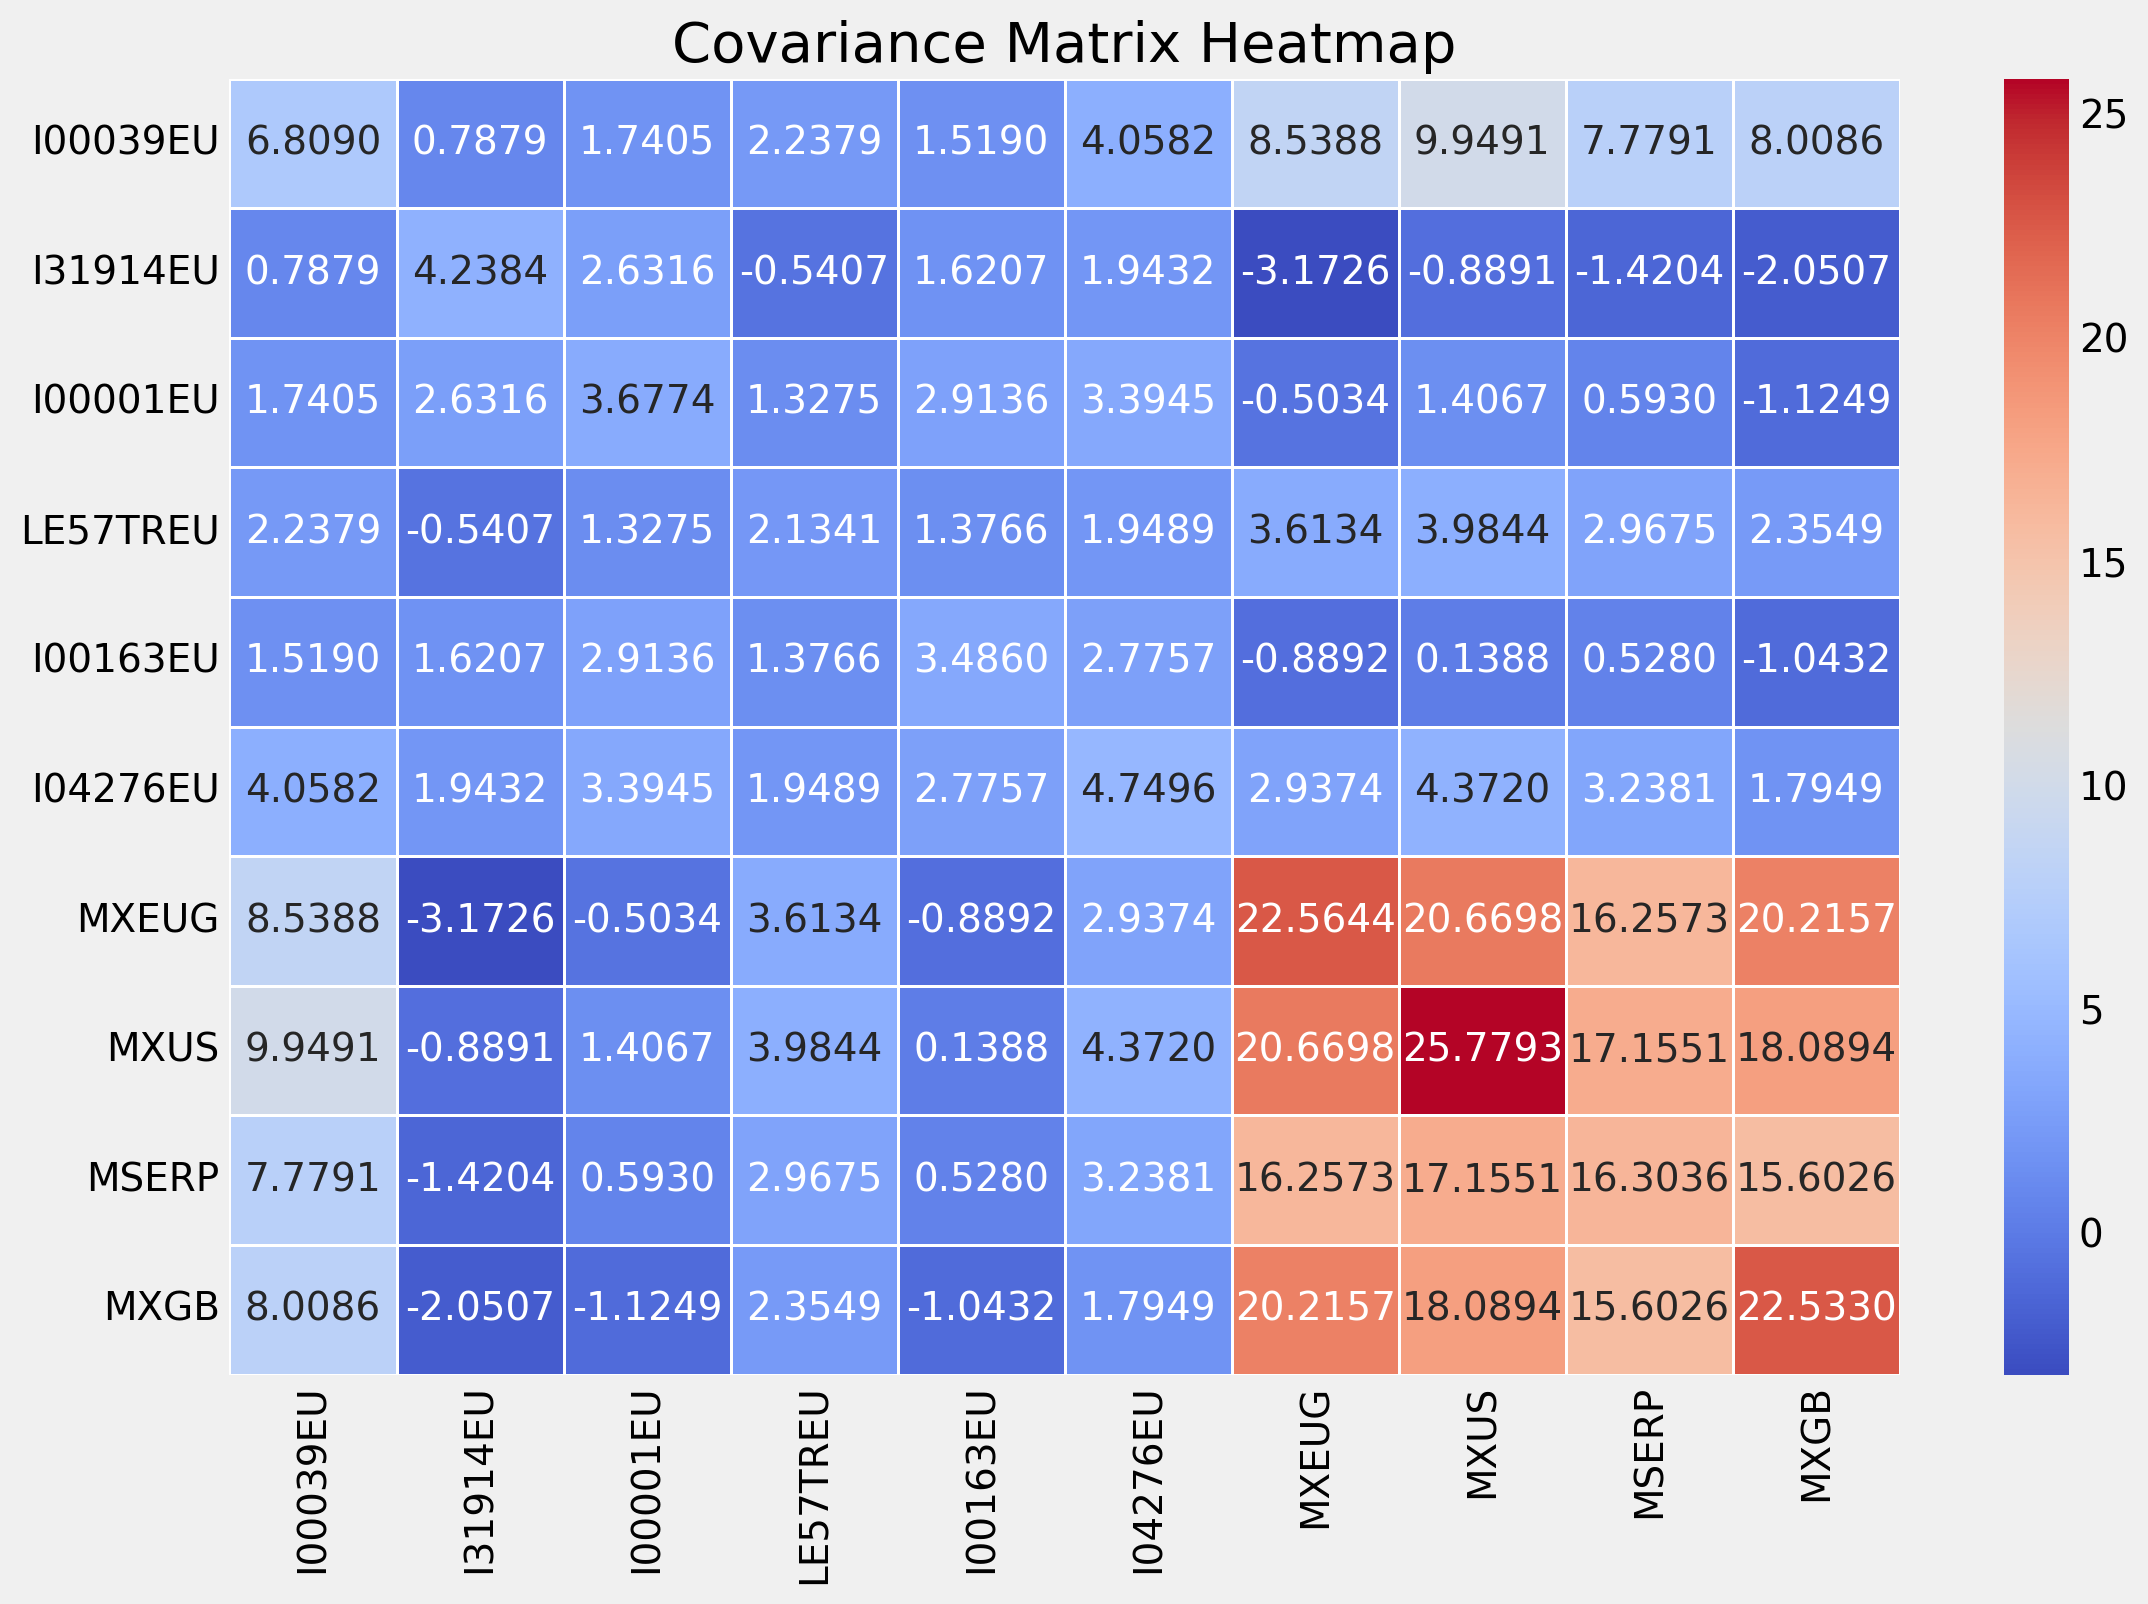

In [90]:
# Plot the covariance matrix heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(covariance_df, annot=True, cmap='coolwarm', fmt='.4f', linewidths=.5)
plt.title('Covariance Matrix Heatmap')
plt.show()

Only the I00039EU has a positive covariance with all other assets, indicating a generally positive relationship with the rest of the portfolio. These strong positive covariances are suggetsing potential diversification benefits. On the orther hand, assets with negative covariances may act as hedges against each other.Overall, the MXEUG, MXUS, MSERP and MXGB indices are having the strongest postive realitionship with each other, which hugely differ from the rest.



### **2. Efficient Frontier**

These index characteristics are going to be to base to create the efficient frontier. The goal is to choose a portfolio that lies on the efficient frontier, as it represents the optimal trade-off between risk and return. These optimal points are calculated based on the expected returns, covariance matrix and the assigned weights. 

In [91]:
# Function to calculate portfolio returns and volatility
def calculate_portfolio_performance(weights, expected_returns, covariance_matrix):
    portfolio_return = np.dot(expected_returns, weights)
    portfolio_volatility = np.sqrt(np.dot(weights.T, np.dot(covariance_matrix, weights)))
    return portfolio_return, portfolio_volatility

# Objective function for minimization (negative returns to maximize returns)
def objective_function(weights, expected_returns, covariance_matrix):
    return -calculate_portfolio_performance(weights, expected_returns, covariance_matrix)[0]

# Constraints: weights sum to 1
constraints = ({'type': 'eq', 'fun': lambda weights: np.sum(weights) - 1})

# Bounds: weights between 0 and 1
bounds = tuple((0, 1) for _ in range(len(expected_returns)))

initial_weights = np.ones(len(expected_returns)) / len(expected_returns)


# Find the indices corresponding to minimum and maximum volatilities
min_volatility_index = np.argmin(volatility)
max_volatility_index = np.argmax(volatility)

# Define the number of target portfolios
num_target_portfolios = 100

# Calculate the range of volatilities
target_volatilities = np.linspace(volatility[min_volatility_index], volatility[max_volatility_index], num_target_portfolios)

optimized_portfolios = []

# Iterate over target volatilities and optimize the portfolio
for target_volatility in target_volatilities:
    # Constraint: Portfolio volatility is equal to the target volatility
    volatility_constraint = {'type': 'eq', 'fun': lambda weights: target_volatility - calculate_portfolio_performance(weights, expected_returns, covariance_matrix)[1]}
    
    result = minimize(objective_function, initial_weights, args=(expected_returns, covariance_matrix),
                      method='SLSQP', bounds=bounds, constraints=[constraints, volatility_constraint],
                      options={'ftol': 1e-10, 'disp': False})
    
    if not result.success:
        print(f"Optimization failed for target volatility: {target_volatility}")
        continue
    
    optimized_portfolios.append(result.x)

# Calculate returns and volatilities for optimized portfolios
portfolio_performance = [calculate_portfolio_performance(weights, expected_returns, covariance_matrix) for weights in optimized_portfolios]
optimized_returns, optimized_volatilities = zip(*portfolio_performance)

# Create a DataFrame to display the results
portfolio_df = pd.DataFrame({
    'Return': optimized_returns,
    'Risk': optimized_volatilities,
    'Weights': optimized_portfolios
})


C:\Users\blank\AppData\Local\Temp\ipykernel_30068\1203775667.py:28: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



<details>

<summary>Code for table</summary>

```python
# Split "Weights" list into columns and set column names
weights_df = pd.DataFrame(portfolio_df['Weights'].tolist(), columns=column_names)

# Concatenate the DataFrames
portfolio_df = pd.concat([portfolio_df, weights_df], axis=1)

# Drop the original "Weights" column
portfolio_df = portfolio_df.drop('Weights', axis=1)

# Function to print DataFrame as a rich table with title and caption
def print_rich_table(df, title):
    console = Console()
    table = Table(title=title, box=box.ROUNDED)
    for col in df.columns:
        table.add_column(col)
    for i, row in df.iterrows():
        table.add_row(*[f'{val:.3f}' if isinstance(val, (int, float)) else str(val) for val in row])
    
    console.print(table)

# Print the head and tail of the DataFrame using the function
print_rich_table(portfolio_df.head(), title="Portfolio Head")
print_rich_table(portfolio_df.tail(), title="Portfolio Tail")
```

</details>


<pre style="white-space:pre;overflow-x:auto;line-height:normal;font-family:Menlo,'DejaVu Sans Mono',consolas,'Courier New',monospace"><span style="font-style: italic">                                                  Portfolio Head                                                   </span>
╭────────┬───────┬──────────┬──────────┬──────────┬──────────┬──────────┬─────────┬───────┬───────┬───────┬───────╮
│<span style="font-weight: bold"> Return </span>│<span style="font-weight: bold"> Risk  </span>│<span style="font-weight: bold"> I00039EU </span>│<span style="font-weight: bold"> I31914EU </span>│<span style="font-weight: bold"> I00001EU </span>│<span style="font-weight: bold"> LE57TREU </span>│<span style="font-weight: bold"> I00163EU </span>│<span style="font-weight: bold"> I04276… </span>│<span style="font-weight: bold"> MXEUG </span>│<span style="font-weight: bold"> MXUS  </span>│<span style="font-weight: bold"> MSERP </span>│<span style="font-weight: bold"> MXGB  </span>│
├────────┼───────┼──────────┼──────────┼──────────┼──────────┼──────────┼─────────┼───────┼───────┼───────┼───────┤
│ 0.288  │ 1.449 │ 0.000    │ 0.640    │ 0.000    │ 0.177    │ 0.000    │ 0.000   │ 0.122 │ 0.061 │ 0.000 │ 0.000 │
│ 0.303  │ 1.485 │ 0.000    │ 0.651    │ 0.000    │ 0.156    │ 0.000    │ 0.000   │ 0.121 │ 0.072 │ 0.000 │ 0.000 │
│ 0.319  │ 1.521 │ 0.000    │ 0.663    │ 0.000    │ 0.136    │ 0.000    │ 0.000   │ 0.119 │ 0.082 │ 0.000 │ 0.000 │
│ 0.334  │ 1.557 │ 0.000    │ 0.674    │ 0.000    │ 0.115    │ 0.000    │ 0.000   │ 0.118 │ 0.093 │ 0.000 │ 0.000 │
│ 0.348  │ 1.594 │ 0.000    │ 0.685    │ 0.000    │ 0.096    │ 0.000    │ 0.000   │ 0.116 │ 0.103 │ 0.000 │ 0.000 │
╰────────┴───────┴──────────┴──────────┴──────────┴──────────┴──────────┴─────────┴───────┴───────┴───────┴───────╯
</pre>
<pre style="white-space:pre;overflow-x:auto;line-height:normal;font-family:Menlo,'DejaVu Sans Mono',consolas,'Courier New',monospace"><span style="font-style: italic">                                                  Portfolio Tail                                                   </span>
╭────────┬───────┬──────────┬──────────┬──────────┬──────────┬──────────┬─────────┬───────┬───────┬───────┬───────╮
│<span style="font-weight: bold"> Return </span>│<span style="font-weight: bold"> Risk  </span>│<span style="font-weight: bold"> I00039EU </span>│<span style="font-weight: bold"> I31914EU </span>│<span style="font-weight: bold"> I00001EU </span>│<span style="font-weight: bold"> LE57TREU </span>│<span style="font-weight: bold"> I00163EU </span>│<span style="font-weight: bold"> I04276… </span>│<span style="font-weight: bold"> MXEUG </span>│<span style="font-weight: bold"> MXUS  </span>│<span style="font-weight: bold"> MSERP </span>│<span style="font-weight: bold"> MXGB  </span>│
├────────┼───────┼──────────┼──────────┼──────────┼──────────┼──────────┼─────────┼───────┼───────┼───────┼───────┤
│ 0.907  │ 4.890 │ 0.000    │ 0.036    │ 0.000    │ 0.000    │ 0.000    │ 0.000   │ 0.000 │ 0.964 │ 0.000 │ 0.000 │
│ 0.912  │ 4.926 │ 0.000    │ 0.029    │ 0.000    │ 0.000    │ 0.000    │ 0.000   │ 0.000 │ 0.971 │ 0.000 │ 0.000 │
│ 0.916  │ 4.962 │ 0.000    │ 0.022    │ 0.000    │ 0.000    │ 0.000    │ 0.000   │ 0.000 │ 0.978 │ 0.000 │ 0.000 │
│ 0.920  │ 4.999 │ 0.000    │ 0.015    │ 0.000    │ 0.000    │ 0.000    │ 0.000   │ 0.000 │ 0.985 │ 0.000 │ 0.000 │
│ 0.925  │ 5.035 │ 0.000    │ 0.008    │ 0.000    │ 0.000    │ 0.000    │ 0.000   │ 0.000 │ 0.992 │ 0.000 │ 0.000 │
╰────────┴───────┴──────────┴──────────┴──────────┴──────────┴──────────┴─────────┴───────┴───────┴───────┴───────╯
</pre>


While the LE57TREU and MXEUG inidices got weights in the lower risk portfolios, they got reduced to zero in the maximum return portfolios. Instead, the  MXUS got almost all the weights. The other index that is also present in the two polars is the I00039EU. Obviously, these portfolios are not very diversified, relying only on a few indices.

<details>

<summary>Code for table</summary>

```python
style_weights_df = pd.DataFrame([style_weights], columns=column_names)
style_weights_df['Return'] = [style_benchmark_expected_return]
style_weights_df['Risk'] = [style_benchmark_risk]
style_weights_df = style_weights_df[['Return', 'Risk'] + column_names]
print_rich_table(style_weights_df, title="Style Weights")
```

</details>


<pre style="white-space:pre;overflow-x:auto;line-height:normal;font-family:Menlo,'DejaVu Sans Mono',consolas,'Courier New',monospace"><span style="font-style: italic">                                                   Style Weights                                                   </span>
╭────────┬───────┬──────────┬──────────┬──────────┬──────────┬──────────┬─────────┬───────┬───────┬───────┬───────╮
│<span style="font-weight: bold"> Return </span>│<span style="font-weight: bold"> Risk  </span>│<span style="font-weight: bold"> I00039EU </span>│<span style="font-weight: bold"> I31914EU </span>│<span style="font-weight: bold"> I00001EU </span>│<span style="font-weight: bold"> LE57TREU </span>│<span style="font-weight: bold"> I00163EU </span>│<span style="font-weight: bold"> I04276… </span>│<span style="font-weight: bold"> MXEUG </span>│<span style="font-weight: bold"> MXUS  </span>│<span style="font-weight: bold"> MSERP </span>│<span style="font-weight: bold"> MXGB  </span>│
├────────┼───────┼──────────┼──────────┼──────────┼──────────┼──────────┼─────────┼───────┼───────┼───────┼───────┤
│ 0.343  │ 2.558 │ 0.000    │ 0.083    │ 0.003    │ 0.357    │ 0.085    │ 0.000   │ 0.085 │ 0.343 │ 0.043 │ 0.000 │
╰────────┴───────┴──────────┴──────────┴──────────┴──────────┴──────────┴─────────┴───────┴───────┴───────┴───────╯
</pre>


Compared to the two extemes of the frontier, the efficient frontier point for our fund is more balanced. It mostly uses the LE57TREU and MXUS indices, leaving the other a samller influence. The only negligable predictors are the I00039EU, I04276EU and MXGB indices.

<details>

<summary>Code for figure</summary>

```python
import plotly.graph_objects as go

# Scatter plot for individual assets
scatter_assets = go.Scatter(
    x=volatility,
    y=expected_returns,
    mode='markers+text',
    marker=dict(color='gray', symbol='circle', size=8),
    name='',
    text=column_names,  # Use column names as text
    textposition='bottom right',
    showlegend=False
)

# Create a DataFrame for the efficient frontier
efficient_frontier_df = pd.DataFrame({
    'Volatility': portfolio_df['Risk'],
    'Return': portfolio_df['Return'],
    'Label': ['Efficient Frontier'] * len(portfolio_df)
})

# Scatter plot for efficient frontier
scatter_efficient_frontier = go.Scatter(
    x=efficient_frontier_df['Volatility'],
    y=efficient_frontier_df['Return'],
    mode='lines',
    line=dict(color='blue', dash='dash'),
    name='Efficient Frontier'
)

# Create a DataFrame for the fund and style benchmark
fund_df = pd.DataFrame({
    'Volatility': [fund_risk],
    'Return': [fund_expected_return],
    'Label': ['Fund']
})

style_benchmark_df = pd.DataFrame({
    'Volatility': [style_benchmark_risk],
    'Return': [style_benchmark_expected_return],
    'Label': ['Style Fund']
})

# Scatter plot for fund and style benchmark
scatter_fund = go.Scatter(
    x=fund_df['Volatility'],
    y=fund_df['Return'],
    mode='markers',
    marker=dict(color='green', symbol='star', size=12),
    name='Fund'
)

scatter_style_benchmark = go.Scatter(
    x=style_benchmark_df['Volatility'],
    y=style_benchmark_df['Return'],
    mode='markers',
    marker=dict(color='orange', symbol='star', size=12),
    name='Style Fund'
)

# Create the figure
fig = go.Figure()

# Add traces to the figure
fig.add_trace(scatter_assets)
fig.add_trace(scatter_efficient_frontier)
fig.add_trace(scatter_fund)
fig.add_trace(scatter_style_benchmark)

# Customize the layout
fig.update_layout(
    title='Efficient Frontier with Individual Assets',
    xaxis_title='Volatility',
    yaxis_title='Return',
    legend=dict(title='Assets', traceorder='reversed'),
    title_x=0.5, title_font=dict(size=20, color='black')
)

# Show the plot
fig.show()


```

</details>

![](eff1.png)



The fund's position with regard to the efficient frontier indicates that it can be more efficient in terms of risk and return. Naturally, the goal of the optimized weights did was to bring the fund closer the efficient frontier. It is located around the I00039EU index, being closer to the low volatility and high return portfolios. Only the MXUS index stands out, overperforming other indices with around the same high volatilites. So, overall, realtive to other benchmarks, the fund is performing well. 

## **Conclusion**

In summary, the style analysis conducted provides valuable insights into the investment strategy and performance attribution of the portfolio. Through a thorough examination of factor exposures and returns, we have identified the predominant investment styles that contribute to the portfolio's overall performance.

The portfolio exhibits a discernible tilt towards certain factors, indicating a deliberate stylistic approach. Our analysis highlights the impact of these factors on returns, shedding light on the sources of alpha and beta. Understanding the style characteristics of the portfolio is crucial for both investors and fund managers to make informed decisions aligned with their investment objectives.

Moreover, the comparison with a relevant style benchmark allows for a comprehensive assessment of the portfolio's relative performance. Evaluating how well the portfolio captures desired styles or deviates from the benchmark provides crucial insights into the effectiveness of the investment strategy.

As always, it's essential to consider the broader market context and economic conditions that may influence style dynamics. This report serves as a foundation for ongoing monitoring and adjustment of the portfolio to align with changing market conditions and investor preferences.

In conclusion, the style analysis not only deepens our understanding of the portfolio's composition but also serves as a valuable tool for refining investment strategies and optimizing risk-return profiles.